# 1. Data Acquisition

In [21]:
import csv
import re
import numpy as np
import pandas as pd
from io import StringIO
import requests


In [22]:
url_train_dev = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTOZ2rC82rhNsJduoyKYTsVeH6ukd7Bpxvxn_afOibn3R-eadZGXu82eCU9IRpl4CK_gefEGsYrA_oM/pub?gid=1863430984&single=true&output=tsv'
url_test = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT-KNR9nuYatLkSbzSRgpz6Ku1n4TN4w6kKmFLkA6QJHTfQzmX0puBsLF7PAAQJQAxUpgruDd_RRgK7/pub?gid=417546901&single=true&output=tsv'

In [23]:
def load_dataset(url):
    r = requests.get(url)
    data = r.content.decode('utf8')
    df = pd.read_csv(StringIO(data), sep='\t')
    df.columns = ['tweet', 'label']
    return df

In [24]:
df_train_dev = load_dataset(url_train_dev)
df_test = load_dataset(url_test)

In [25]:
df_train_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52675 entries, 0 to 52674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   52675 non-null  object
 1   label   52675 non-null  object
dtypes: object(2)
memory usage: 823.2+ KB


In [26]:
df_train_dev.head()

,tweet,label
0,يا من أناديها ويخنقني البكاء ويكاد صمت الدمع ...,ar
1,فيه فرق بين اهل غزة اللى مطحونين من ناحيتين وب...,ar
2,ﻋﻦ ﺍﻟﻠﺤﻈﺔ اﻟﺤﻠﻮﺓﺓ ﺍﻟﻠﻲ ﺑﺘﻐﻤﺾ ﻓﻴﻬﺎ ﻋﻴﻨﻴﻚ ﺑﺘﻔﻜﺮ ...,ar
3,يا ابو سلو عرفتني,ar
4,ب50 ريال أكفل معتمر في رمضان ، ولك بإذن الله م...,ar


In [27]:
df_train_dev.label.unique()

array(['ar', 'ar_LATN', 'az', 'bg', 'bn', 'bs', 'ca', 'cs', 'cy', 'da',
       'de', 'dv', 'el', 'en', 'es', 'et', 'fa', 'fi', 'fr', 'gl', 'ha',
       'he', 'hi', 'hi-Latn', 'hr', 'ht', 'hu', 'hy', 'id', 'is', 'it',
       'ja', 'ja_LATN', 'jv', 'km', 'ko', 'ko_LATN', 'ms', 'ne', 'nl',
       'no', 'pl', 'ps', 'ps_LATN', 'pt', 'ro', 'ru', 'si', 'sl', 'sq',
       'sr', 'su', 'sv', 'sw', 'ta', 'ta_LATN', 'th', 'tl', 'tn', 'tr',
       'uk', 'und', 'ur', 'ur_LATN', 'vi', 'wo', 'xh', 'zh-CN', 'zh-TW'],
      dtype=object)

In [28]:
pd.set_option('display.max_rows', 500)  
pd.set_option('display.max_columns', 500)   
pd.set_option('display.width', 4000)        
df_train_dev.groupby('label').size()

label
ar          2199
ar_LATN       12
az             1
bg             2
bn             8
bs             4
ca            22
cs             4
cy             1
da             7
de           171
dv             1
el            28
en         18508
es          5930
et             2
fa            18
fi            15
fr           946
gl             3
ha             1
he            27
hi            16
hi-Latn       15
hr             5
ht             2
hu            15
hy             2
id          3006
is             1
it           339
ja         10421
ja_LATN        1
jv            10
km             2
ko           458
ko_LATN        1
ms           119
ne             5
nl           182
no            11
pl            93
ps             1
ps_LATN        1
pt          2878
ro            12
ru           978
si             1
sl             2
sq             9
sr            22
su            10
sv            54
sw             6
ta             9
ta_LATN        1
th           462
tl           320
tn      

# 2.Data Augmentation

## 2.1 Back translation

In [ ]:
pip install transformers
pip install mosestokenizer
pip install SentencePiece

In [8]:
import transformers, mosestokenizer

In [16]:
from transformers import MarianMTModel, MarianTokenizer

# Helper function to download data for a language
def download(model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    return tokenizer, model



# download model for English -> Romance
#tmp_lang_tokenizer, tmp_lang_model = download('Helsinki-NLP/opus-mt-en-ROMANCE')
# download model for Romance -> English
#src_lang_tokenizer, src_lang_model = download('Helsinki-NLP/opus-mt-ROMANCE-en')



def translate(texts, model, tokenizer, language):
    """Translate texts into a target language"""
    # Format the text as expected by the model
    formatter_fn = lambda txt: f"{txt}" if language == "en" else f">>{language}<< {txt}"
    original_texts = [formatter_fn(txt) for txt in texts]

    # Tokenize (text to tokens)
    tokens = tokenizer.prepare_seq2seq_batch(original_texts)

    # Translate
    translated = model.generate(**tokens)

    # Decode (tokens to text)
    translated_texts = tokenizer.batch_decode(translated, skip_special_tokens=True)

    return translated_texts


def back_translate(texts, language_src, language_dst):
    """Implements back translation"""
    # Translate from source to target language
    translated = translate(texts, tmp_lang_model, tmp_lang_tokenizer, language_dst)

    # Translate from target language back to source language
    back_translated = translate(translated, src_lang_model, src_lang_tokenizer, language_src)

    return back_translated




In [29]:
model_name = 'Helsinki-NLP/opus-mt-aav-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
tokenizer.supported_language_codes

AttributeError: ignored

In [30]:
language_code_list =df_train_dev['label'].unique

def get_one_language_data(df, n):
  #get the n'th set of language from df_train_dev
  df_one_lang=df[df['label'].isin([language_code_list[n]])]
  return df_one_lang

def generate_new_rows(df_one_lang):
  lable=df_one_lang['label']
  df_one_lang_new = pd.DataFrame(columns=['text','label'])
  for rows in df_one_lang.itterows():
    new_lang = back_translate(df_one_lang['text'],label,'en')
    df_one_lang_new.append({'text':new_lang,'label'label})
    df_one_lang=df_one_lang.append(df_one_lang_new)
  return df_one_lang

def augdata_by_back_translation(df):
  df_new = pd.DataFrame(columns=['text','label'])
  for n in range(0,len(language_code_list)):
    df_one_lang_new = generate_new_rows(get_one_language_data(df,n))
    df_new = df_new.append(df_one_lang_new)
  return df_new



,tweet,label
0,يا من أناديها ويخنقني البكاء ويكاد صمت الدمع ...,ar
1,فيه فرق بين اهل غزة اللى مطحونين من ناحيتين وب...,ar
2,ﻋﻦ ﺍﻟﻠﺤﻈﺔ اﻟﺤﻠﻮﺓﺓ ﺍﻟﻠﻲ ﺑﺘﻐﻤﺾ ﻓﻴﻬﺎ ﻋﻴﻨﻴﻚ ﺑﺘﻔﻜﺮ ...,ar
3,يا ابو سلو عرفتني,ar
4,ب50 ريال أكفل معتمر في رمضان ، ولك بإذن الله م...,ar
...,...,...
52670,其實我很想問，噗浪怎麼鎖回應然後又開啟的#### http://t.co/sQBh6jmVoW,zh-TW
52671,我喜歡一部 @YouTube 影片 http://t.co/Kouv0xaEos FIGHT...,zh-TW
52672,一分鐘世界盃！http://t.co/yEvaMrp7ki,zh-TW
52673,{CWB} 桃園縣 一週天氣預報(07/27 05:00發布): 07/27 白天 溫度:2...,zh-TW


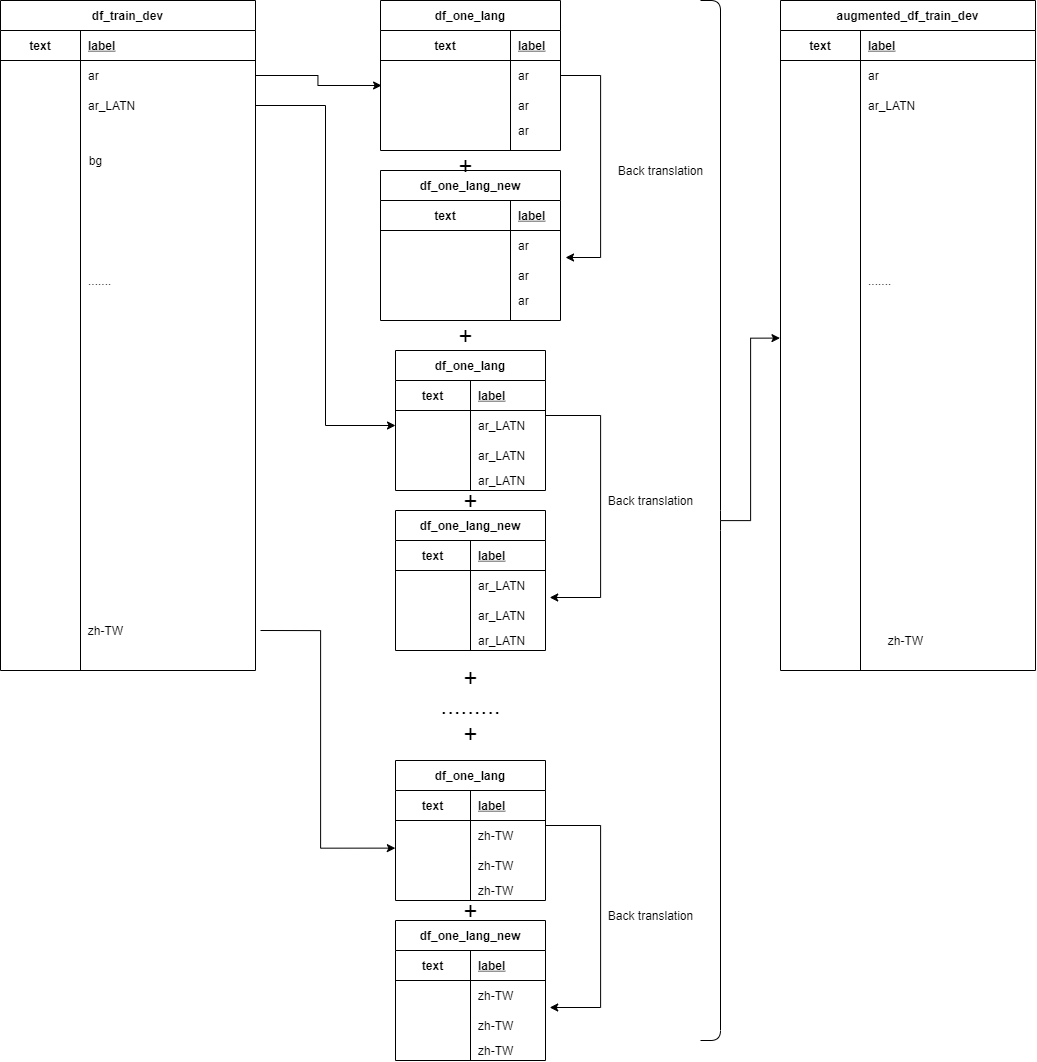

## 2.2 Bigram flipping














In [ ]:
def augdata_by_bigram_flipping(df):

  return df_new

##  2.3 Replacing Entities

In [31]:
def augdata_by_replacing_entities(df):

  return df_new

# 3.Text Cleaning 

# 4.Pre-Processing

# 5.Feature Engineering


# 6.Modeling 

#7.Evaluation